In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tikzplotlib
import os

import scipy.stats as st

In [7]:
scratchHPC = r'\\rb-hpc.de.bosch.com\hro7rng\scratch\MultiPhase'

In [8]:
StudienOrdner = '211028_Volstudie_36HRC_1'
StudienOrdner = os.path.join(scratchHPC, StudienOrdner)

In [9]:
lf_csv = r'_eval/lifetime.csv'
lf_csv = os.path.join(StudienOrdner, lf_csv)

In [10]:
os.path.isdir(scratchHPC)

True

In [11]:
df_lf = pd.read_csv(lf_csv)

In [45]:
df_lf

,Unnamed: 0,ModelName,ModelGroup,Lifetime,Phase,_LoadingMode,StrainAmplitude,StrainMean,StressAmplitude,StressMean,FIPmax,FIPmaxLocal,FIPcrit,m_FIP,IsExperimentalData,Volume_Martensite,Seed
0,0.0,DisTest_Seed36003_Strain0p9_VolumeFraction90,ALL,1070.059728,wholeMod,0.0,0.009,0.0,974.2910,-1.2130,0.044112,0.093569,2.521240,1.724138,0,90.0,36003
1,0.1,DisTest_Seed36003_Strain0p9_VolumeFraction90,ALL,2028.220614,Martensite,0.0,0.009,0.0,974.2910,-1.2130,0.022581,0.087651,1.870093,1.724138,0,90.0,36003
2,0.2,DisTest_Seed36003_Strain0p9_VolumeFraction90,ALL,1070.059728,Ferrite,0.0,0.009,0.0,974.2910,-1.2130,0.044112,0.093569,2.521240,1.724138,0,90.0,36003
3,1.0,DisTest_Seed93426_Strain0p6_VolumeFraction90,ALL,2855.763261,wholeMod,0.0,0.006,0.0,792.2645,-0.2895,0.024963,0.049594,2.521240,1.724138,0,90.0,93426
4,1.1,DisTest_Seed93426_Strain0p6_VolumeFraction90,ALL,5444.687304,Martensite,0.0,0.006,0.0,792.2645,-0.2895,0.012735,0.029502,1.870093,1.724138,0,90.0,93426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,118.1,DisTest_Seed22187_Strain0p6_VolumeFraction85,ALL,6471.577930,Martensite,0.0,0.006,0.0,785.4075,-0.2955,0.011521,0.036552,1.870093,1.724138,0,85.0,22187
326,118.2,DisTest_Seed22187_Strain0p6_VolumeFraction85,ALL,5520.713394,Ferrite,0.0,0.006,0.0,785.4075,-0.2955,0.017032,0.049494,2.521240,1.724138,0,85.0,22187
327,119.0,DisTest_Seed36003_Strain0p3_VolumeFraction95,ALL,35564.267293,wholeMod,0.0,0.003,0.0,540.4905,-0.0195,0.005781,0.009727,2.521240,1.724138,0,95.0,36003
328,119.1,DisTest_Seed36003_Strain0p3_VolumeFraction95,ALL,53421.920657,Martensite,0.0,0.003,0.0,540.4905,-0.0195,0.003387,0.009727,1.870093,1.724138,0,95.0,36003


In [12]:
ll_volf = df_lf['ModelName'].tolist()
ll_volf = [float(kk[kk.rfind('_')+15:])   for kk in ll_volf]

ll_Seed = df_lf['ModelName'].tolist()
ll_Seed = [str(kk[kk.find('_')+5:kk.find('Strain')-1])   for kk in ll_Seed]

In [13]:
minimia_vol = min(ll_volf)
maxima_vol = max(ll_volf)

In [14]:
df_lf['Volume_Martensite'] = ll_volf
df_lf['Seed'] = ll_Seed

df_wholMod = df_lf[df_lf['Phase']=='wholeMod']

In [15]:
norm = matplotlib.colors.Normalize(vmin=minimia_vol, vmax=maxima_vol, clip=True)
mapper = matplotlib.cm.ScalarMappable(norm=norm) 

In [16]:
from scipy import optimize

def tfunktion(x_data, a,b):
    return a*(x_data**2)+b*x_data+x_data


In [17]:
params, params_covariance = optimize.curve_fit(tfunktion, df_wholMod['Lifetime'].tolist(), df_wholMod['StrainAmplitude'].tolist(),)

In [18]:
colorswhole = df_wholMod['Volume_Martensite'].tolist()
un_voll = np.unique(colorswhole)
colorswhole = [float(c) for c in colorswhole]

strain_ll = np.unique(df_wholMod['StrainAmplitude'].tolist())

dic_f_curve = {}
for  vol in un_voll:
    df_red = df_wholMod[df_wholMod['Volume_Martensite']==vol]
    params, params_covariance = optimize.curve_fit(tfunktion, df_red['Lifetime'].tolist(), df_red['StrainAmplitude'].tolist())
    
    ll_mean_lifetimes = [np.min(df_red[df_red['StrainAmplitude']==stra]['Lifetime'].tolist()) for stra in strain_ll]
    print(ll_mean_lifetimes)
    f_curve = [tfunktion(lf, params[0], params[1]) for lf in ll_mean_lifetimes]
    dic_f_curve[vol] = f_curve

print(dic_f_curve)

[26983.41633352517, 3159.2466049233067, 789.2214091614863]
[27445.458673345915, 2855.76326062357, 775.2353901019571]
[20615.11055587117, 3001.841639871302, 723.3673061784642]
[63232.2112993635, 6152.275779853123, 2197.2776346560163]
{85.0: [0.003855869570543291, 0.0005817717733407335, 0.00014857294570447266], 90.0: [0.0056360795970249455, 0.0009414642640876991, 0.0002637273473737878], 95.0: [0.003879604282701621, 0.0007294119554899225, 0.00018089724903802562], 100.0: [0.002984627972182352, 0.008248620226368075, 0.0031429218579432927]}


Text(0, 0.5, 'Strain')

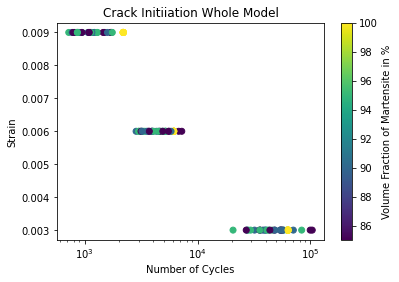

In [19]:

plt.scatter(df_wholMod['Lifetime'], df_wholMod['StrainAmplitude'], c=colorswhole)
cbar = plt.colorbar(mapper)
cbar.set_label('Volume Fraction of Martensite in %')
plt.xscale('log')
plt.title('Crack Initiiation Whole Model')
plt.xlabel('Number of Cycles')
plt.ylabel('Strain')
#plt.show()


#plt.savefig(os.path.join(StudienOrdner, 'ScatterLifetimeWholeMod.png'), bbox_inches='tight', dpi=150, transparent=True)

In [20]:
df_Ferrite = df_lf[df_lf['Phase']=='Ferrite']

In [21]:
colorsFerr = df_Ferrite['Volume_Martensite'].tolist()
colorsFerr = [float(c) for c in colorsFerr]

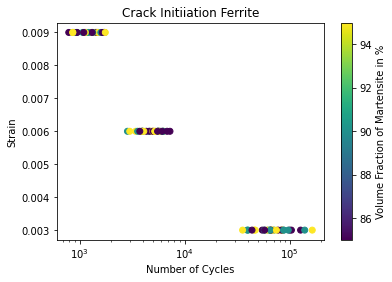

In [22]:
plt.scatter(df_Ferrite['Lifetime'], df_Ferrite['StrainAmplitude'], c=colorsFerr)
cbar = plt.colorbar()
cbar.set_label('Volume Fraction of Martensite in %')
plt.xscale('log')
plt.title('Crack Initiiation Ferrite')
plt.xlabel('Number of Cycles')
plt.ylabel('Strain')
plt.show()

In [23]:
df_mart = df_lf[df_lf['Phase']=='Martensite']

In [24]:
colorsMart = df_mart['Volume_Martensite'].tolist()
colorsMart = [int(c) for c in colorsMart]

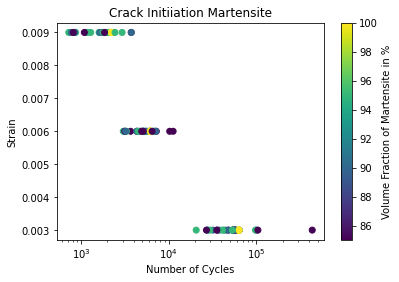

In [25]:
plt.scatter(df_mart['Lifetime'], df_mart['StrainAmplitude'], c=colorsMart)
cbar = plt.colorbar(mapper)
cbar.set_label('Volume Fraction of Martensite in %')
plt.xscale('log')
plt.title('Crack Initiiation Martensite')
plt.xlabel('Number of Cycles')
plt.ylabel('Strain')
plt.show()

Abwärts erstelle confidence intervalle

In [26]:
strainll = np.unique(df_wholMod['StrainAmplitude'].tolist())
dic_df_conf = {}
ch_df = {'whole': df_wholMod, 'Ferrite': df_Ferrite, 'Martensite': df_mart}
dd_ll = ['whole','Ferrite','Martensite']
for dd in dd_ll:
    df_conf = pd.DataFrame({'StrainAmplitude': strainll})
    for vols in np.unique(ll_volf):
        mean = []
        l_bound= []
        u_bound =  []
        for strain in strainll:
            rdf = ch_df[dd][ch_df[dd]['Volume_Martensite'] == vols]
            rdf = rdf[rdf['StrainAmplitude'] == strain]
            a = rdf['Lifetime'].tolist()
            if len(a) != 0:
                s_mean = np.mean(a)
                sl_bound, su_bound = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
                if sl_bound<0:
                    sl_bound = min(a)
            if len(a) == 0:
                s_mean,sl_bound, su_bound = np.NaN,np.NaN,np.NaN

            mean.append(s_mean), l_bound.append(sl_bound), u_bound.append(su_bound)
        df_conf['l_bound VolF '+ str(vols)] = l_bound
        df_conf['mean VolF '+ str(vols)] = mean
        df_conf['u_bound VolF '+ str(vols)] = u_bound
    dic_df_conf[dd] = df_conf

C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\scipy\stats\_distn_infrastructure.py:2098: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\scipy\stats\_distn_infrastructure.py:2099: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\scipy\stats\_distn_infrastructure.py:2098: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\scipy\stats\_distn_infrastructure.py:2099: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\scipy\stats\_distn_infrastructure.py:2098: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\scipy\stats\_d

In [40]:
df_mart

,Unnamed: 0,ModelName,ModelGroup,Lifetime,Phase,_LoadingMode,StrainAmplitude,StrainMean,StressAmplitude,StressMean,FIPmax,FIPmaxLocal,FIPcrit,m_FIP,IsExperimentalData,Volume_Martensite,Seed
1,0.1,DisTest_Seed36003_Strain0p9_VolumeFraction90,ALL,2028.220614,Martensite,0.0,0.009,0.0,974.2910,-1.2130,0.022581,0.087651,1.870093,1.724138,0,90.0,36003
4,1.1,DisTest_Seed93426_Strain0p6_VolumeFraction90,ALL,5444.687304,Martensite,0.0,0.006,0.0,792.2645,-0.2895,0.012735,0.029502,1.870093,1.724138,0,90.0,93426
7,2.1,DisTest_Seed22187_Strain0p6_VolumeFraction90,ALL,6899.291313,Martensite,0.0,0.006,0.0,788.1455,-0.2755,0.011101,0.034210,1.870093,1.724138,0,90.0,22187
10,3.1,DisTest_Seed78333_Strain0p3_VolumeFraction90,ALL,27445.458673,Martensite,0.0,0.003,0.0,537.7110,-0.0250,0.004984,0.008075,1.870093,1.724138,0,90.0,78333
14,4.2,DisTest_Seed25609_Strain0p6_VolumeFraction90,ALL,5960.368944,Martensite,0.0,0.006,0.0,791.1600,-0.2660,0.012084,0.029101,1.870093,1.724138,0,90.0,25609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,115.1,DisTest_Seed22187_Strain0p3_VolumeFraction90,ALL,56605.498371,Martensite,0.0,0.003,0.0,537.1350,-0.0250,0.003275,0.008698,1.870093,1.724138,0,90.0,22187
320,116.1,DisTest_Seed22187_Strain0p3_VolumeFraction100,ALL,63232.211299,Martensite,0.0,0.003,0.0,540.8715,-0.0095,0.003071,0.007430,1.870093,1.724138,0,100.0,22187
322,117.1,DisTest_Seed81296_Strain0p3_VolumeFraction95,ALL,20615.110556,Martensite,0.0,0.003,0.0,538.6000,-0.0170,0.005883,0.008986,1.870093,1.724138,0,95.0,81296
325,118.1,DisTest_Seed22187_Strain0p6_VolumeFraction85,ALL,6471.577930,Martensite,0.0,0.006,0.0,785.4075,-0.2955,0.011521,0.036552,1.870093,1.724138,0,85.0,22187


Plotten der confidence Intervalle

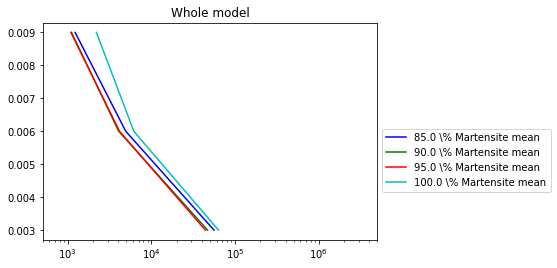

In [55]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']
df_conf = dic_df_conf['whole']

for num, vols in enumerate(np.unique(ll_volf)):

    plt.plot(df_conf['mean VolF ' + str(vols)],df_conf['StrainAmplitude'], label= (str(vols)+' \% Martensite mean'), color=colorlist[num])
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
plt.xscale('log')
plt.title('Whole model')
plt.legend(loc= 'lower left',bbox_to_anchor=(1.0, 0.2))#, ncol=2 )
plt.xlim([5*10**2,5*10**6])

tikzplotlib.save(os.path.join(StudienOrdner, 'ConfLifetimeWholeMod.tex'))
plt.savefig(os.path.join(StudienOrdner, 'ConfLifetimeWholeMod.png'), bbox_inches='tight', dpi=150, transparent=True)


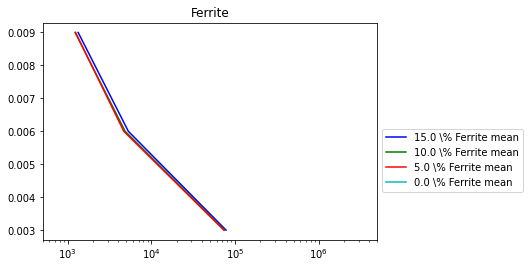

In [56]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']
df_conf = dic_df_conf['Ferrite']
volls_red = []
for num, vols in enumerate(np.unique(ll_volf)):
    #if num%2 == 0:
        volls_red.append(vols)
    
for num, vols in enumerate(volls_red):
    plt.plot(df_conf['mean VolF ' + str(vols)],df_conf['StrainAmplitude'], label= (str(100-vols)+' \% Ferrite mean'), color=colorlist[num])
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
plt.xscale('log')
plt.title('Ferrite')
plt.legend(loc= 'lower left',bbox_to_anchor=(1.0, 0.2))#, ncol=2 )
plt.xlim([5*10**2,5*10**6])

tikzplotlib.save(os.path.join(StudienOrdner, 'ConfLifetimeFerrite.tex'))
plt.savefig(os.path.join(StudienOrdner, 'ConfLifetimeFerrite.png'), bbox_inches='tight', dpi=150, transparent=True)


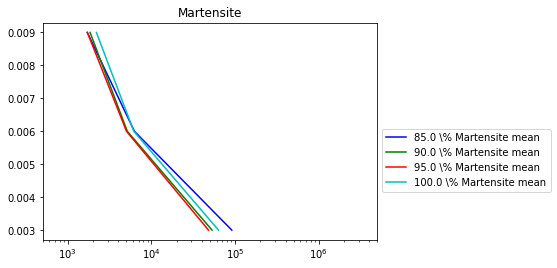

In [57]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']
df_conf = dic_df_conf['Martensite']
volls_red = []
for num, vols in enumerate(np.unique(ll_volf)):
    #if num%2 == 0:
        volls_red.append(vols)
    
for num, vols in enumerate(volls_red):
    plt.plot(df_conf['mean VolF ' + str(vols)],df_conf['StrainAmplitude'], label= (str(vols)+' \% Martensite mean'), color=colorlist[num])
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
plt.xscale('log')
plt.xlim([5*10**2,5*10**6])
plt.legend(loc = 'lower left',bbox_to_anchor=(1.0, 0.2))#, ncol=2 )
plt.title('Martensite')


tikzplotlib.save(os.path.join(StudienOrdner, 'ConfLifetimeMartensite.tex'))
plt.savefig(os.path.join(StudienOrdner, 'ConfLifetimeMartensite.png'), bbox_inches='tight', dpi=150, transparent=True)


In [30]:
### AChtung lower bound ist nicht ganz korrekt das dieser durch die große varianz eine negative Lebensdauer angeben würde
### dacher ist in diesen Fällen der Lower Bound = minimum der Lebenszeit für definierte Dehnung und Volumengehalt

In [31]:
mnbv= df_lf[df_lf['StrainAmplitude']==0.009]
mnbv= mnbv[mnbv['Seed']=='93426']
mnbv[mnbv['Volume_Martensite'].isin([95.0,75.0])]

,Unnamed: 0,ModelName,ModelGroup,Lifetime,Phase,_LoadingMode,StrainAmplitude,StrainMean,StressAmplitude,StressMean,FIPmax,FIPmaxLocal,FIPcrit,m_FIP,IsExperimentalData,Volume_Martensite,Seed
15,5.0,DisTest_Seed93426_Strain0p9_VolumeFraction95,ALL,895.036824,wholeMod,0.0,0.009,0.0,987.54,-1.249,0.048927,0.107422,2.521240,1.724138,0,95.0,93426
16,5.1,DisTest_Seed93426_Strain0p9_VolumeFraction95,ALL,1605.100320,Martensite,0.0,0.009,0.0,987.54,-1.249,0.025863,0.081032,1.870093,1.724138,0,95.0,93426
17,5.2,DisTest_Seed93426_Strain0p9_VolumeFraction95,ALL,895.036824,Ferrite,0.0,0.009,0.0,987.54,-1.249,0.048927,0.107422,2.521240,1.724138,0,95.0,93426


Bestimme liegt geringste Lebenszeit immer mit Ferrit zusammen? 

In [36]:
df_03 = df_lf[df_lf['StrainAmplitude']==0.003]
df_06 = df_lf[df_lf['StrainAmplitude']==0.006]
df_09 = df_lf[df_lf['StrainAmplitude']==0.009]

In [39]:
c_df = df_03 
ll_model = c_df['Unnamed: 0'].tolist()


ll_prob_phase = []
for mod in ll_model:
    if mod%1 == 0:
        ltime = c_df[c_df['Unnamed: 0'] == mod]['Lifetime']
        
        phases = [g for g in ll_model if int(mod) == int(g) and g!=mod]
        
        for ph in phases:
            if float(c_df[c_df['Unnamed: 0'] == ph]['Lifetime']) == float(ltime):
                ll_prob_phase.append([len(phases),df_lf[df_lf['Unnamed: 0'] == ph]['Phase'].values[0]])        

print(np.unique(ll_prob_phase,axis=0))

[['1' 'Martensite']
 ['2' 'Ferrite']
 ['2' 'Martensite']]


In [34]:
ll_prob_phase = []
for mod in ll_model:
    if mod%1 == 0:
        ltime = df_lf[df_lf['Unnamed: 0'] == mod]['Lifetime']
        
        phases = [g for g in ll_model if int(mod) == int(g) and g!=mod]
        ltime = 9e300
        phaseprob = ''
        for ph in phases:
            if float(df_lf[df_lf['Unnamed: 0'] == ph]['Lifetime']) < ltime:
                ltime = float(df_lf[df_lf['Unnamed: 0'] == ph]['Lifetime'])
                phaseprob = df_lf[df_lf['Unnamed: 0'] == ph]['Phase'].values[0]
        ll_prob_phase.append([len(phases),phaseprob])        

print(np.unique(ll_prob_phase,axis=0))

[['1' 'Martensite']
 ['2' 'Ferrite']
 ['2' 'Martensite']]


In [35]:
strainll = np.unique(df_wholMod['StrainAmplitude'].tolist())
dic_df_StressAmp = {}
ch_df = {'whole': df_wholMod, 'Ferrite': df_Ferrite, 'Martensite': df_mart}
dd_ll = ['whole','Ferrite','Martensite']
for dd in dd_ll:
    df_conf = pd.DataFrame({'StrainAmplitude': strainll})
    for vols in np.unique(ll_volf):
        mean = []
        l_bound= []
        u_bound =  []
        for strain in strainll:
            rdf = ch_df[dd][ch_df[dd]['Volume_Martensite'] == vols]
            rdf = rdf[rdf['StrainAmplitude'] == strain]
            a = rdf['StressAmplitude'].tolist()
            if len(a) != 0:
                s_mean = np.mean(a)
                sl_bound, su_bound = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
                if sl_bound<0:
                    sl_bound = min(a)
            if len(a) == 0:
                s_mean,sl_bound, su_bound = np.NaN,np.NaN,np.NaN

            mean.append(s_mean), l_bound.append(sl_bound), u_bound.append(su_bound)
        df_conf['l_bound VolF '+ str(vols)] = l_bound
        df_conf['mean VolF '+ str(vols)] = mean
        df_conf['u_bound VolF '+ str(vols)] = u_bound
    dic_df_StressAmp[dd] = df_conf

C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\scipy\stats\_distn_infrastructure.py:2098: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\scipy\stats\_distn_infrastructure.py:2099: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\scipy\stats\_distn_infrastructure.py:2098: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\scipy\stats\_distn_infrastructure.py:2099: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\scipy\stats\_distn_infrastructure.py:2098: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\scipy\stats\_d

Plotten confidence Intervalle bezogen auf Stress::

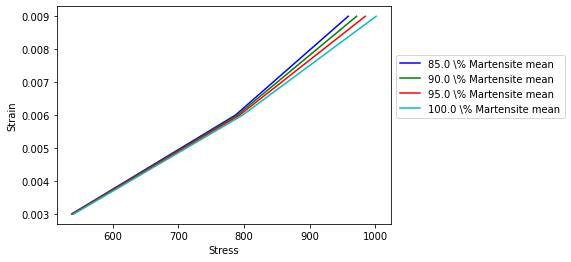

In [60]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']

df_conf = dic_df_StressAmp['whole']
for num, vols in enumerate(np.unique(ll_volf)):
    plt.plot(df_conf['mean VolF ' + str(vols)],df_conf['StrainAmplitude'], label= (str(vols)+' \% Martensite mean'), color=colorlist[num])
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
#plt.xscale('log')
plt.legend(bbox_to_anchor=(1.0, 0.8), ncol=1 )
plt.xlabel('Stress')
plt.ylabel('Strain')
plt.title('')


tikzplotlib.save(os.path.join(StudienOrdner, 'StressAmplitude.tex'))
plt.savefig(os.path.join(StudienOrdner, 'StressAmplitude.png'), bbox_inches='tight', dpi=150, transparent=True)


In [36]:
df_conf

,StrainAmplitude,l_bound VolF 75.0,mean VolF 75.0,u_bound VolF 75.0,l_bound VolF 80.0,mean VolF 80.0,u_bound VolF 80.0,l_bound VolF 85.0,mean VolF 85.0,u_bound VolF 85.0,l_bound VolF 90.0,mean VolF 90.0,u_bound VolF 90.0,l_bound VolF 95.0,mean VolF 95.0,u_bound VolF 95.0,l_bound VolF 100.0,mean VolF 100.0,u_bound VolF 100.0
0,0.003,597.358805,597.89685,598.434895,602.960271,603.4456,603.930929,608.509463,609.01435,609.519237,614.059961,614.64785,615.235739,619.664959,620.40605,621.147141,625.320210,625.8033,626.286390
1,0.006,1013.479630,1016.18950,1018.899370,1039.756564,1041.9895,1044.222436,1066.717318,1068.57550,1070.433682,1094.632513,1096.21350,1097.794487,1123.468423,1125.16250,1126.856577,1154.470332,1155.3550,1156.239668
2,0.009,1335.684642,1341.36850,1347.052358,1394.812067,1399.3035,1403.794933,1456.208419,1459.65850,1463.108581,1520.394653,1523.18100,1525.967347,1587.246359,1590.09100,1592.935641,1660.758063,1662.0265,1663.294937
